**Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

**Fecthing the California Housing Dataset**

In [2]:
# as_frame is False by default. So, by setting it to True, the dataset is fetched in the form of a pandas dataframe
housing = fetch_california_housing(as_frame=True).frame
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [23]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


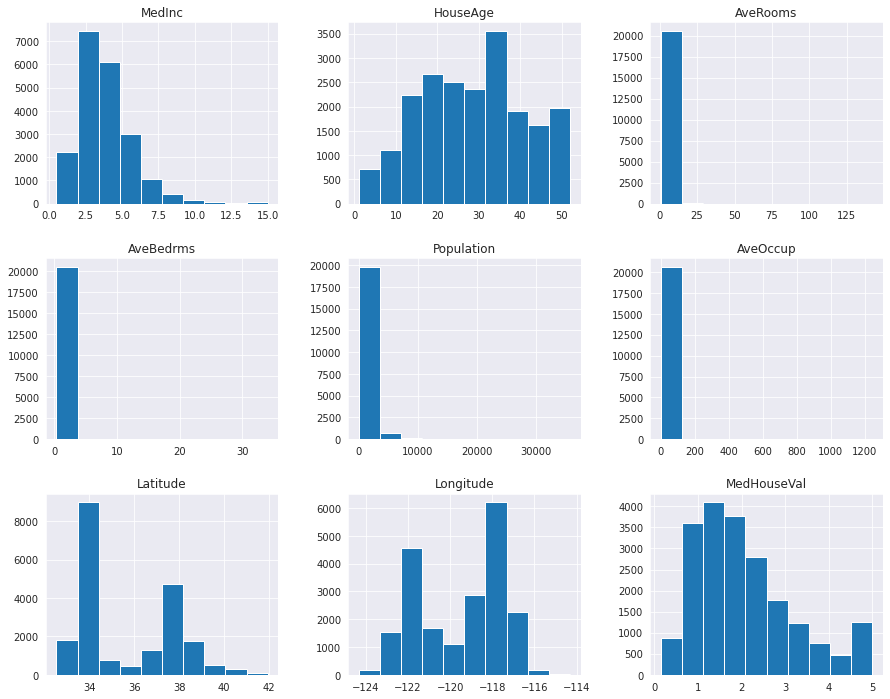

In [29]:
# plotting he distribution of features
housing.hist(figsize = (15,12))
plt.show()

**Splitting the dataset**

In [3]:
# 'MedHouseVal' is the target variable to find Median House Value
X = housing.drop(columns=['MedHouseVal'],axis=1)
y = housing.MedHouseVal

In [4]:
#Splitting the data into train, vaidation and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

**Applying standardization using StandardScaler()**

In [5]:
# StandardScaler function imported from preprocessing module of sklearn
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [6]:
X_train = pd.DataFrame(X_train)
X_train.shape

(11610, 8)

In [7]:
X_test = pd.DataFrame(X_test)
X_test.shape

(5160, 8)

In [8]:
X_valid = pd.DataFrame(X_valid)
X_valid.shape

(3870, 8)

### **Building a regression MLP model using the Sequential API with 1 hidden layer and 30 units**

In [9]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:], name= 'hiddenlayer'),
    tf.keras.layers.Dense(1, activation="linear", name='outputlayer')
])
model1.compile(loss='mse', optimizer='adam')
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer (Dense)         (None, 30)                270       
                                                                 
 outputlayer (Dense)         (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [10]:
history1 = model1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.4302 - val_loss: 0.7527
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6114 - val_loss: 0.5573
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4821 - val_loss: 0.4853
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4318 - val_loss: 0.4595
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4094 - val_loss: 0.4463
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3985 - val_loss: 0.4419
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3893 - val_loss: 0.4441
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3834 - val_loss: 0.4295
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3743 - val_loss: 0.4356
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3693 - val_loss: 0.4277

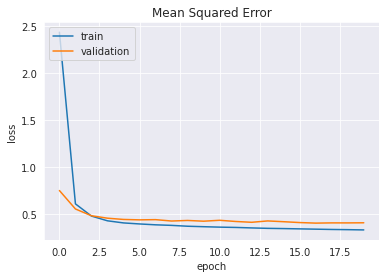

In [19]:
# "Loss"
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Mean Squared Error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
model1.evaluate(X_test,y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3634


0.36335912346839905

The above neural network has an accuracy of around 65%

### **Using the functional API to build the following Wide & Deep Neural Network with the following architecture.**
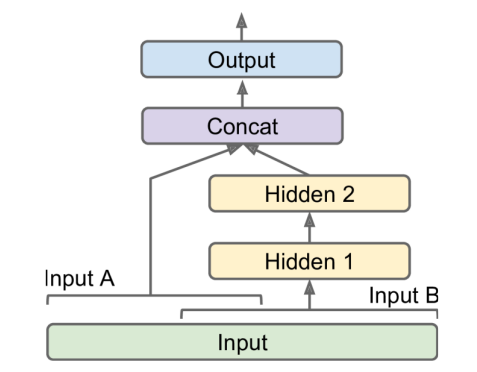

With 30 units in the hidden layers, features 0 to 4 in the wide
path and features 2 to 7 into the deep path.

In [13]:
input_a = tf.keras.layers.Input(shape = [5], name = 'wide_input')   # features from 0 to 4
input_b = tf.keras.layers.Input(shape = [6], name = 'deep_input')   # features from 2 to 7
hidden1 = tf.keras.layers.Dense(30, activation = 'relu')(input_b)
hidden2 = tf.keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = tf.keras.layers.concatenate([input_a, hidden2])
output = tf.keras.layers.Dense(1, name = 'output')(concat)

In [14]:
model2 = tf.keras.Model(inputs=[input_a, input_b], outputs=output, name="mnist_model")
model2.compile(loss='mse', optimizer='adam')
model2.summary()

Model: "mnist_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                        

In [15]:
# X_train,X_test, X_valid all columns are indexing from 0 to 7
x_train_a, x_train_b = X_train.iloc[:, :5], X_train.iloc[:, 2:]
x_validation_a, x_validation_b = X_valid.iloc[:, :5], X_valid.iloc[:, 2:]
x_test_a, x_test_b = X_test.iloc[:, :5], X_test.iloc[:, 2:]

In [16]:
history2 = model2.fit((x_train_a, x_train_b), y_train, epochs=20, validation_data=((x_validation_a, x_validation_b), y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.3118 - val_loss: 0.9082
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6253 - val_loss: 0.6402
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4917 - val_loss: 0.5702
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4494 - val_loss: 0.5138
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4055 - val_loss: 0.5037
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3934 - val_loss: 0.4905
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3837 - val_loss: 0.5579
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4152 - val_loss: 0.5014
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3921 - val_loss: 0.5222
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3803 - val_loss: 0.4612

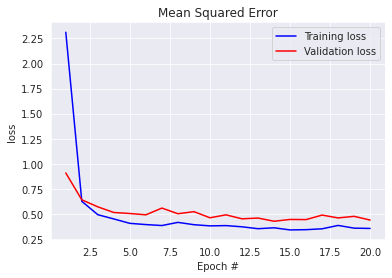

In [20]:
sns.set_style("darkgrid")
#get the details form the history object
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Mean Squared Error')
plt.legend()

plt.show()


In [21]:
model2.evaluate((x_test_a, x_test_b), y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3765


0.3764779567718506

The above neural network has an accuracy of around 64% same as the model built using the Sequential API

## Overall Performance:
Comparitively, both the models have almost same performance but their accuracy can be further improved by changing the number of epochs or other hyperparameters.